This notebook uses data generated on an x64 workstation using the gfdl-ws site files and intel compiler,
using
```
module load ifort/11.1.073
module load intel_compilers
module use /home/sdu/publicmodules
module load netcdf/4.2
module load mpich2/1.5b1
```
for the `build/intel/env` file and run-time environment.

This experiment has linear stratification for initial conditions and a surface cooling buoyancy flux with no wind stress. 

In [1]:
import numpy
import scipy.io.netcdf
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 4.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
bml_prog_z=scipy.io.netcdf_file('BML/prog_z.nc','r')
kpp_prog_z=scipy.io.netcdf_file('KPP/prog_z.nc','r')
epbl_prog_z=scipy.io.netcdf_file('EPBL/prog_z.nc','r')
bml_visc=scipy.io.netcdf_file('BML/visc.nc','r')
kpp_visc=scipy.io.netcdf_file('KPP/visc.nc','r')
epbl_visc=scipy.io.netcdf_file('EPBL/visc.nc','r')

In [3]:
t = bml_prog_z.variables['Time'][:]
zw = -bml_prog_z.variables['zw'][:]
zt = -bml_prog_z.variables['zt'][:]

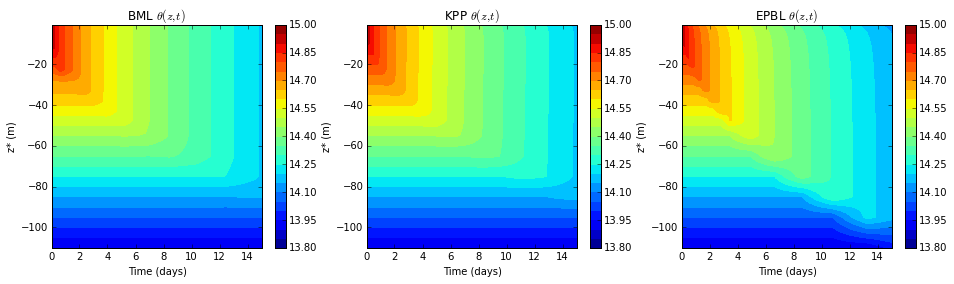

In [4]:
plt.subplot(131);
plt.contourf(t[1:], zt[:24], bml_prog_z.variables['temp'][1:,:24,1,1].T, levels=numpy.arange(13.8,15.05,.05));
plt.colorbar(); plt.xlabel('Time (days)'); plt.ylabel('z* (m)'); plt.title(r'BML $\theta(z,t)$');
plt.subplot(132);
plt.contourf(t[1:], zt[:24], kpp_prog_z.variables['temp'][1:,:24,1,1].T, levels=numpy.arange(13.8,15.05,.05));
plt.colorbar(); plt.xlabel('Time (days)'); plt.ylabel('z* (m)'); plt.title(r'KPP $\theta(z,t)$');
plt.subplot(133);
plt.contourf(t[1:], zt[:24], epbl_prog_z.variables['temp'][1:,:24,1,1].T, levels=numpy.arange(13.8,15.05,.05));
plt.colorbar(); plt.xlabel('Time (days)'); plt.ylabel('z* (m)'); plt.title(r'EPBL $\theta(z,t)$');

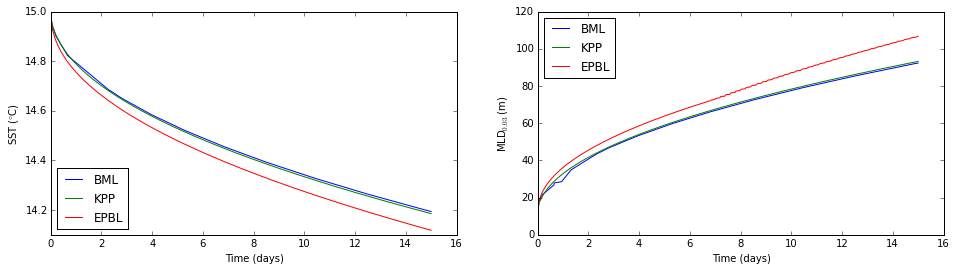

In [5]:
plt.subplot(121);
plt.plot(t[1:], bml_prog_z.variables['temp'][1:,0,1,1].T, label='BML');
plt.plot(t[1:], kpp_prog_z.variables['temp'][1:,0,1,1].T, label='KPP');
plt.plot(t[1:], epbl_prog_z.variables['temp'][1:,0,1,1].T, label='EPBL');
plt.legend(loc='lower left'); plt.xlabel('Time (days)'); plt.ylabel('SST ($\degree$C)');
plt.subplot(122);
plt.plot(t[:], bml_visc.variables['MLD_003'][:,1,1].T, label='BML');
plt.plot(t[:], kpp_visc.variables['MLD_003'][:,1,1].T, label='KPP');
plt.plot(t[:], epbl_visc.variables['MLD_003'][:,1,1].T, label='EPBL');
plt.legend(loc='upper left'); plt.xlabel('Time (days)'); plt.ylabel('MLD$_{0.03}$ (m)');